In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

travels = pd.read_csv('customertravel.csv')

In [2]:
travels.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [3]:
travels.tail()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0
953,31,Yes,High Income,1,No,No,0


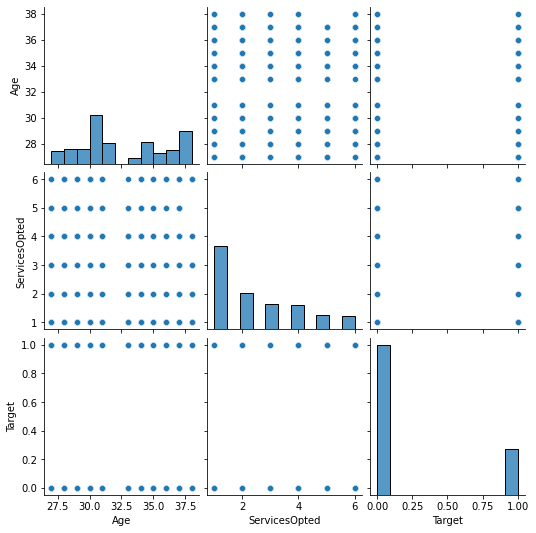

In [4]:
sns.pairplot(travels)

<AxesSubplot:xlabel='Target', ylabel='count'>

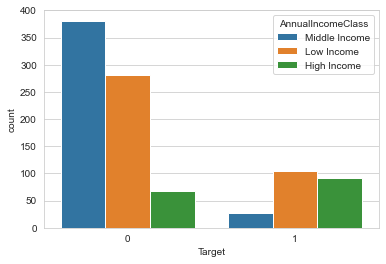

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Target', hue='AnnualIncomeClass', data=travels)

<AxesSubplot:xlabel='Target', ylabel='count'>

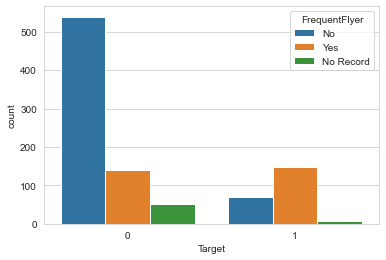

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Target', hue='FrequentFlyer', data=travels)

<AxesSubplot:>

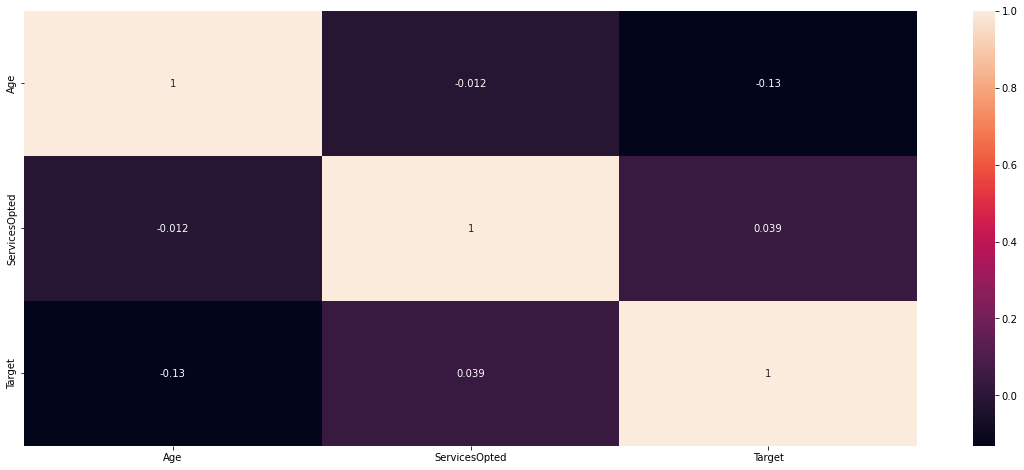

In [5]:
plt.figure(figsize = (20,8))
sns.heatmap(travels.corr(), annot=True)

# Issue where there's too much categorical data that I can't analyze through heatmaps and pairplots, so time to get_dummies. 

In [6]:
travels2 = pd.get_dummies(data=travels, drop_first=True)
travels2

,Age,ServicesOpted,Target,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income,AccountSyncedToSocialMedia_Yes,BookedHotelOrNot_Yes
0,34,6,0,0,0,0,1,0,1
1,34,5,1,0,1,1,0,1,0
2,37,3,0,0,0,0,1,1,0
3,30,2,0,0,0,0,1,0,0
4,30,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
949,31,1,0,0,1,1,0,0,0
950,30,5,0,0,0,0,1,0,1
951,37,4,0,0,0,0,1,0,0
952,30,1,0,0,0,1,0,1,1


# Trying a pairplot of everything that went through get_dummies.

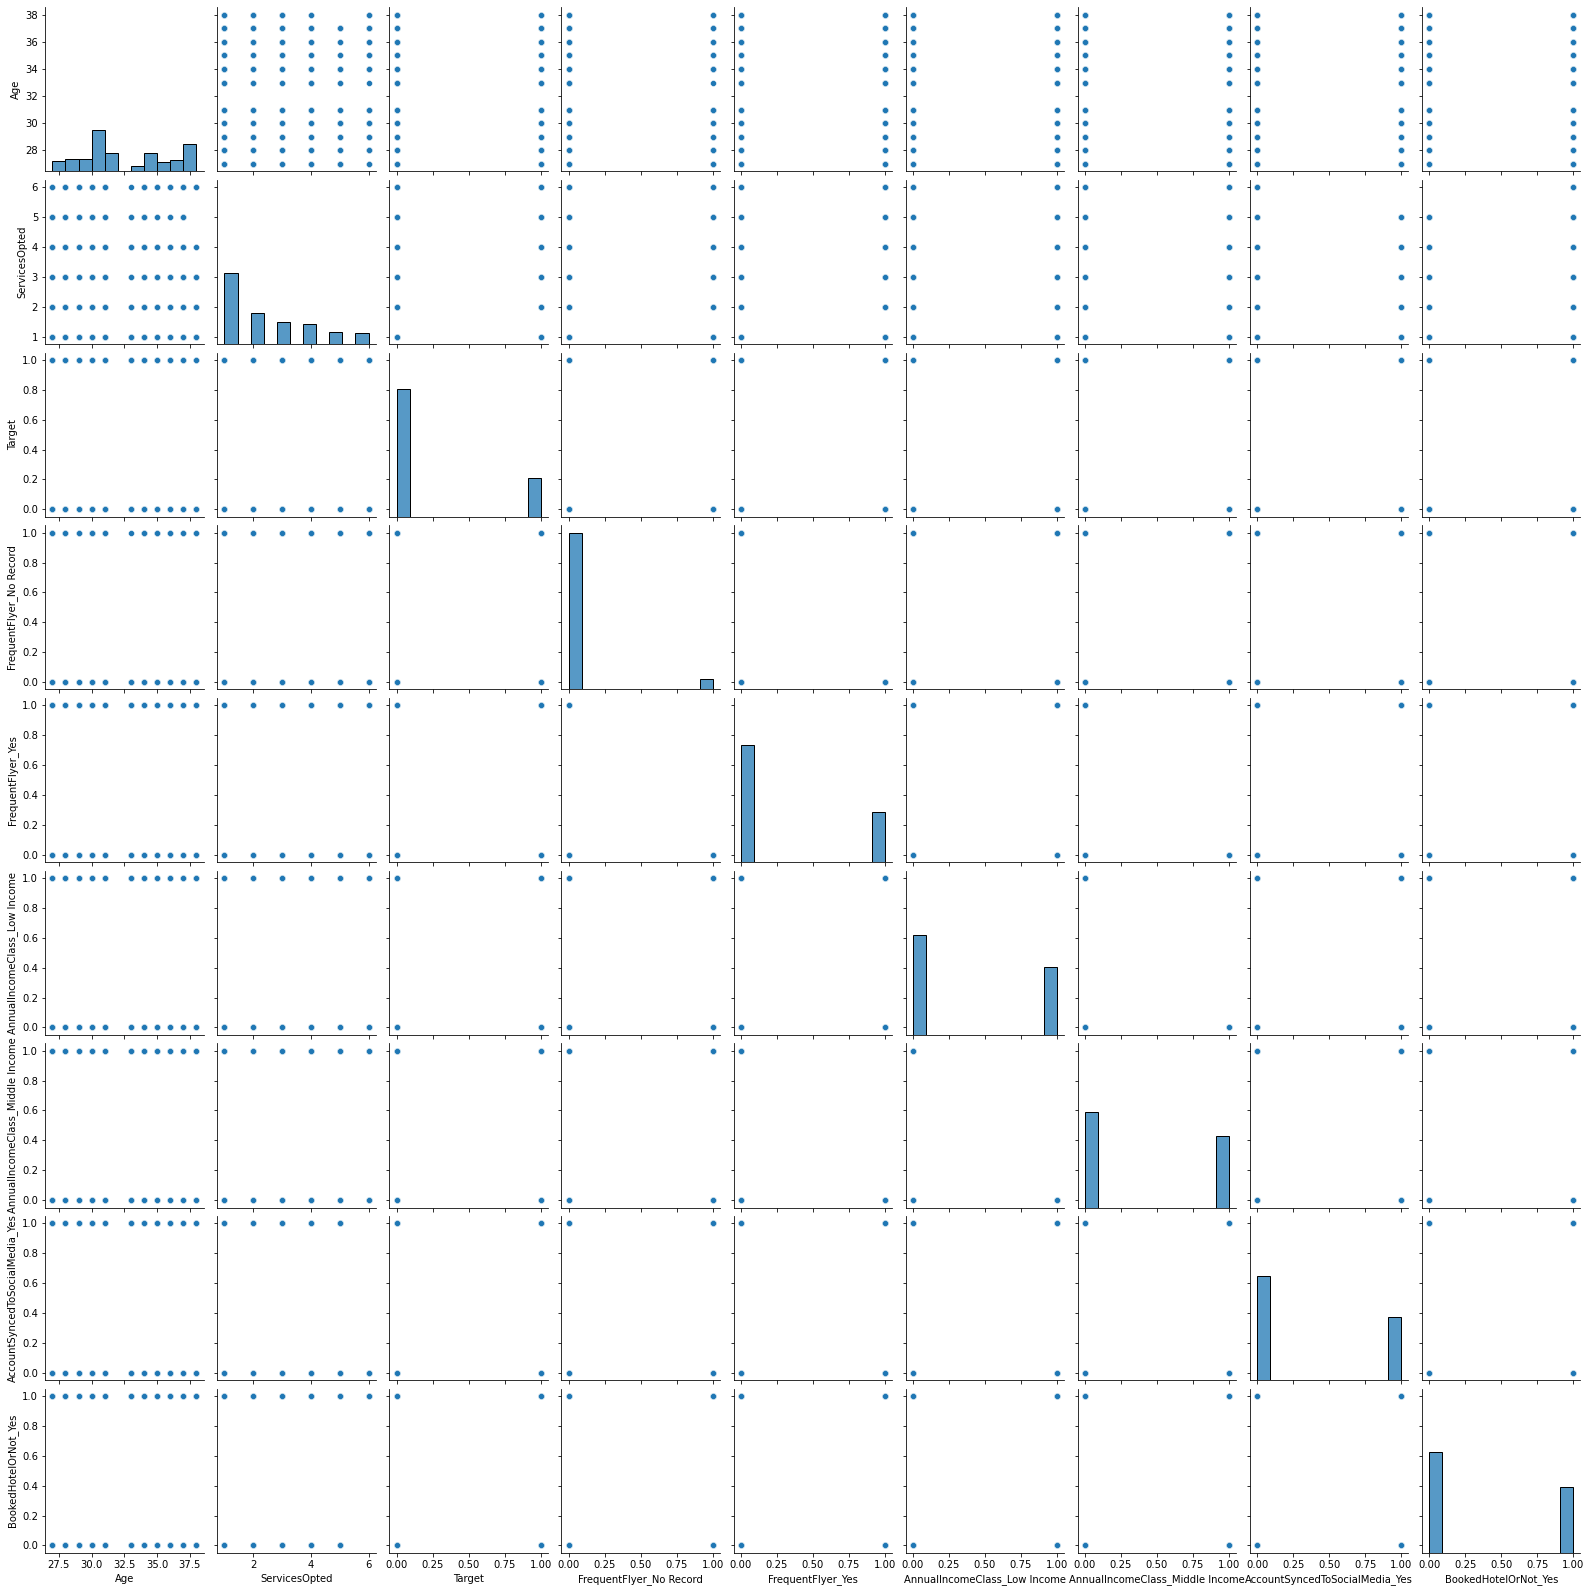

In [9]:
sns.pairplot(travels2)

<AxesSubplot:>

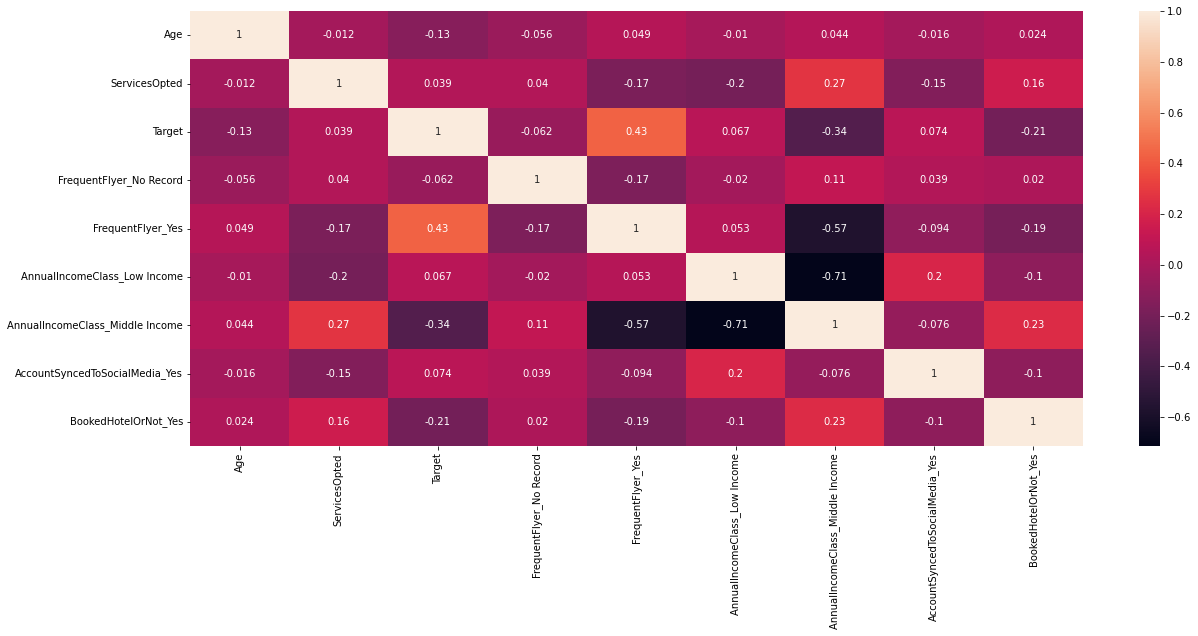

In [7]:
#now for my favorite part, the heatmap after all the categoricals have been turned into numericals.

plt.figure(figsize = (20,8))
sns.heatmap(travels2.corr(), annot=True)

# Correlations with Churn (Target column) 
#Strongest correlation is Frequent Flyer
#Just after that is Middle Income
#And the last is Booking a Hotel. 